# TODO 
- Scale either SPY or A/D Line somehow
- When all stocks up to date, plot $SPY with the A/D line and look at divergences

In [1]:
from stock_utils import *

In [2]:
##
## NOTE: This relies on all the data in this folder being up to date, as it will
##       look back some specified number of days. So if the stock data ends at different days,
##       it will misrepresent the actual values we are looking for
g = glob.glob('new_stock_data/*.csv')

In [3]:
viewing_window = 50

advances_for_this_window = []
declines_for_this_window = []

for i in range(-viewing_window, 0):
    advances_today = []
    declines_today = []
    for j in range(len(g)):
        df = pd.DataFrame()
        df = df.from_csv(g[j])
        df = df.sort_index(axis=0)
        
        ticker = ticker_from_csv(g[j])
        
        ## For CSV's lacking data
        if not len(df) - 1 > viewing_window:
            continue
        
        #print((ticker,i))
        close_difference = df['close'][i] - df['close'][i-1]
        if close_difference > 0:
            advances_today.append((ticker, np.absolute(close_difference)))
        elif close_difference < 0:
            declines_today.append((ticker, np.absolute(close_difference)))
            
    advances_for_this_window.append(advances_today)
    declines_for_this_window.append(declines_today)

In [4]:
for i in range(-viewing_window, 0):
    print('Date is today ' + str(i))
    print('Number of advances on this day was: ' + str(len(advances_for_this_window[i])))
    print('Number of declines on this day was: ' + str(len(declines_for_this_window[i])))
    print()

Date is today -50
Number of advances on this day was: 360
Number of declines on this day was: 142

Date is today -49
Number of advances on this day was: 275
Number of declines on this day was: 223

Date is today -48
Number of advances on this day was: 226
Number of declines on this day was: 271

Date is today -47
Number of advances on this day was: 365
Number of declines on this day was: 129

Date is today -46
Number of advances on this day was: 255
Number of declines on this day was: 243

Date is today -45
Number of advances on this day was: 249
Number of declines on this day was: 251

Date is today -44
Number of advances on this day was: 249
Number of declines on this day was: 249

Date is today -43
Number of advances on this day was: 311
Number of declines on this day was: 190

Date is today -42
Number of advances on this day was: 218
Number of declines on this day was: 279

Date is today -41
Number of advances on this day was: 248
Number of declines on this day was: 253

Date is to

In [12]:
SPY = pd.DataFrame()
SPY = SPY.from_csv('stock_data/spy.csv')
SPY = get_close_price(SPY)

#### Positive divergence between the indicator and the index may suggest that the index will go up soon, while negative divergence may indicate it will go down soon. Extreme divergences may be predictive aof a crash of some sort

In [15]:
SPY[-viewing_window:]

array([ 243.77,  242.64,  244.66,  243.01,  242.95,  242.84,  243.13,
        243.29,  241.33,  243.49,  241.35,  241.8 ,  242.21,  242.77,
        240.55,  242.11,  242.37,  242.19,  244.01,  244.42,  245.56,
        245.53,  245.66,  246.99,  247.1 ,  246.88,  246.82,  247.42,
        247.43,  247.2 ,  246.91,  246.77,  247.32,  247.44,  246.96,
        247.41,  247.87,  247.26,  247.25,  243.76,  244.12,  246.54,
        246.51,  246.94,  243.09,  242.71,  242.9 ,  245.44,  244.56,
        243.99])

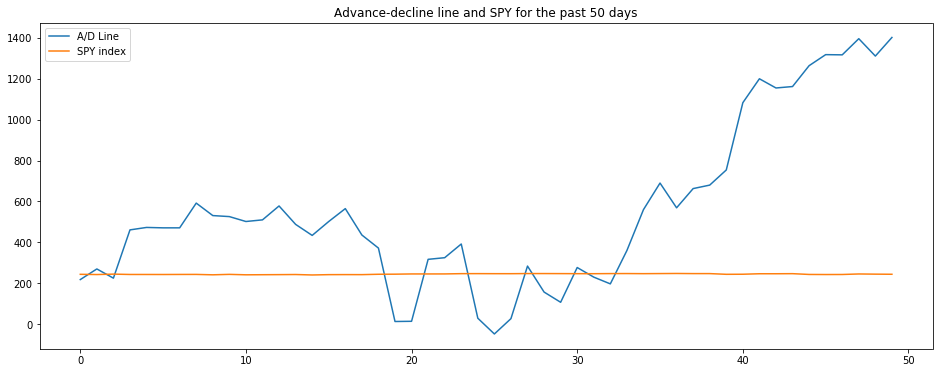

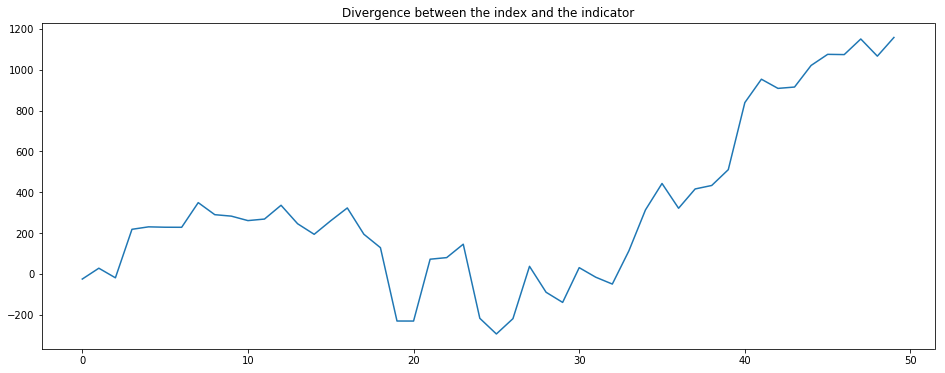

In [14]:
ad_line = np.zeros(len(advances_for_this_window))
current_ad = 0

for i in range(len(advances_for_this_window)):
    current_ad += len(advances_for_this_window[i]) - len(declines_for_this_window[i])
    ad_line[i] = current_ad
    
plt.figure(figsize=(16,6))
plt.plot(ad_line, label='A/D Line')
plt.title('Advance-decline line and SPY for the past ' + str(viewing_window) + ' days')
#plt.figure(figsize=(16,6))
plt.plot(SPY[-viewing_window:], label='SPY index')
plt.legend()
plt.show()

divergence = []
for i in range(viewing_window):
    divergence.append(ad_line[i] - SPY[-viewing_window + i])

plt.figure(figsize=(16,6))
plt.title('Divergence between the index and the indicator')
plt.plot(divergence)
plt.show()